In [57]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import AUROC_functions as auroc
import kernel_SVM_functions as kSVM

The upshot of this is that C and gamma are both important paramters to define the decision surface. <br>
C determines the smoothness of the decision surface -- small C means more smooth, whereas a high C will make the classifier try to classify each point exactly. <br>
gamma affects the similarity measure between the vectors. If gamma is large, the range of similarity is smaller therfore the model is more prone to overfitting.

In [58]:
with open('synth_data/synth_0.15.csv', 'r') as f:
    data = np.loadtxt(f, delimiter=',')

    np.random.shuffle(data)
    X_train = data[: 40, :-1]
    t_train = data[:40, -1].reshape(-1, 1)
    X_test = data[40: , :-1]
    t_test = data[40: , -1].reshape(-1, 1)

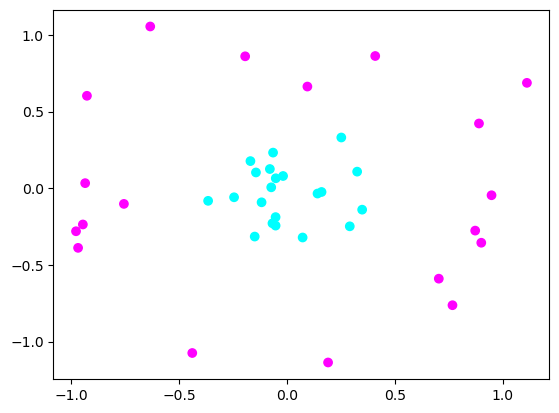

In [59]:
plt.scatter(X_train[:, 0], X_train[:, 1], c = t_train, cmap = 'cool')
plt.show()


## Checking out this kernel business

In [6]:
# this function is provided to you, you do not need to alter it in any way.
def plot(X, y, support_vectors=None, predict_func=None):
    
    cmap='bwr'
    res = 100
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    delta = max((x_max-x_min)/5, (y_max-y_min)/5)
    x_min -= delta
    y_min -= delta
    x_max += delta
    y_max += delta
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, res),np.linspace(y_min, y_max, res))
    if predict_func is None:
        Z = np.ones(xx.shape)*.5
    else:
        Z = predict_func(np.hstack([xx.reshape(-1,1), yy.reshape(-1,1)]))
        if Z.ndim == 1:
            Z = Z.reshape(xx.shape)
        else:
            Z = Z[:,-1].reshape(xx.shape)
    if support_vectors is None:
        edge_colors = 'w'
        sizes = 50
    else:
        edge_colors = ['k' if s else 'w' for s in support_vectors]
        sizes = [100 if s else 50 for s in support_vectors]
    plt.figure(figsize=(5,5))
    plt.contourf(xx, yy, Z, levels=20, cmap=cmap, alpha=.5)
    plt.scatter(X[:,0],X[:,1], c=y, s=sizes, edgecolors=edge_colors, cmap=cmap)
    plt.grid()
    plt.axis('equal')
    plt.show()

In [33]:
#Getting similarity based on kernel
N = X_train.shape[0]
#Large gamma means the range of similarity is .
#increasing gamma means an overfitted model
G = [2 ** i for i in range(-3, 3)]

sims = {}

for gamma in G:

    H = np.zeros(shape = (N, N))

    for i in range(N):
        for j in range(N):
            H[i, j] = kSVM.rbf_kernel(X_train[i], X_train[j], gamma)

    idx = np.where(t_train.flatten() == 1)[0]
    pos = H[idx]
    pos = pos[:, idx]

    neg = H[~idx]
    neg = neg[:, ~idx]

    sims[f'{gamma}'] = {'H': H, 'P': pos, 'N': neg}


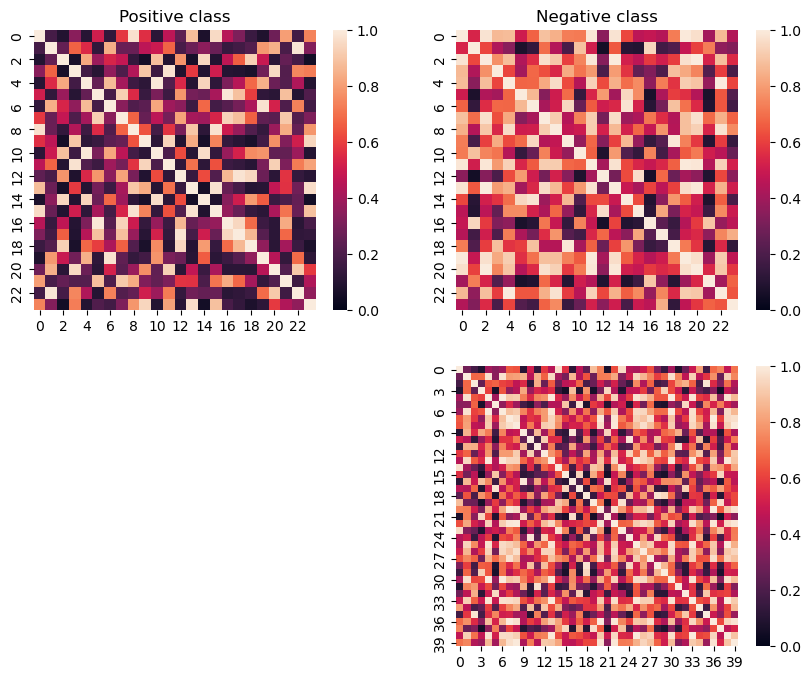

In [32]:
#plotting with heatmaps
fig, ax = plt.subplots(2, 2, figsize = (10, 8))

i = 2
gamma = G[i]

P = sims[f'{gamma}']['P']
N = sims[f'{gamma}']['N']
H = sims[f'{gamma}']['H']
sns.heatmap(P, ax=ax[0, 0], vmin = 0, vmax = 1)
sns.heatmap(N, ax=ax[0, 1], vmin = 0, vmax = 1)
sns.heatmap(H, vmin = 0, vmax = 1)
ax[0, 0].set_title('Positive class')
ax[0, 1].set_title('Negative class')
ax[1, 0].axis('off')
plt.show()
